# Creative Programming Assignment 1

## Data description

### Description

The data used in this CPA is the dataset on demographic characteristics of people receiving COVID-19 vaccinations in the United States at national level. It's provided by CDC.

### URL

https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Demographics-in-the-United-St/km4m-vcsb

There is an export button on the top right corner, you can click that button and choose export as csv to download the data.

### Interesting questions

1. What are the vaccination rate among different age groups?
2. Is the monthly vannination rate ascending?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Load data

In [2]:
data = pd.read_csv("COVID-19_Vaccination_Demographics_in_the_United_States_National.csv")

## Descriptive statistics

In [3]:
data.describe()

,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
count,1.268400e+04,12231.000000,12684.000000,1.268400e+04,9966.000000,9966.000000,12231.000000,12684.000000,12684.000000,12231.000000,12684.000000,12231.000000,1.268400e+04,1.268400e+04
mean,4.038579e+07,23.851549,24.153879,3.370186e+07,43.128216,36.343227,23.651230,24.231307,8.040271,10.539392,26.358428,10.585046,5.265020e+06,6.761446e+05
std,6.162489e+07,31.612173,31.805998,5.356237e+07,31.110463,29.011519,31.672273,32.064950,15.779099,24.749371,34.205817,24.535662,1.573349e+07,1.937049e+06
min,6.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.205739e+06,1.000000,1.100000,4.534258e+05,9.700000,3.125000,0.800000,0.900000,0.000000,0.000000,0.800000,0.000000,0.000000e+00,0.000000e+00
50%,1.192180e+07,9.200000,9.000000,9.369288e+06,47.400000,40.200000,8.900000,8.600000,0.000000,0.000000,9.600000,0.000000,0.000000e+00,0.000000e+00
75%,4.814081e+07,35.100000,35.900000,3.856240e+07,66.700000,57.700000,29.900000,34.000000,5.925000,6.600000,40.000000,7.700000,8.906395e+05,2.510068e+05
max,2.544044e+08,99.900000,100.000000,2.164498e+08,95.000000,95.000000,99.900000,100.000000,68.900000,99.900000,100.000000,99.900000,9.561429e+07,1.362891e+07


## Data analysis

In [4]:
# Data column indicies
print(data.columns)

# Print row indicies
print(data.index)

Index(['Date', 'Demographic_category', 'Administered_Dose1',
       'Administered_Dose1_pct_known', 'Administered_Dose1_pct_US',
       'Series_Complete_Yes', 'Administered_Dose1_pct_agegroup',
       'Series_Complete_Pop_pct_agegroup', 'Series_Complete_Pop_Pct_known',
       'Series_Complete_Pop_Pct_US', 'Booster_Doses_Vax_pct_agegroup',
       'Booster_Doses_Pop_Pct_known', 'Booster_Doses_Vax_Pct_US',
       'Booster_Doses_Pop_Pct_known_Last14Days', 'Booster_Doses_Yes',
       'Booster_Doses_Yes_Last14Days'],
      dtype='object')
RangeIndex(start=0, stop=12684, step=1)


In [5]:
# The first 10 rows of the data
data.head(n=10)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,03/10/2022,Race_eth_NHMult_Oth,11266087,6.0,4.4,10021058,95.0,95.0,6.0,4.6,53.9,6.0,5.9,6.4,5132503,56654
1,03/10/2022,US,254404423,NaN,100.0,216449810,76.6,65.2,NaN,100.0,45.8,NaN,100.0,NaN,95614292,990978
2,03/10/2022,Ages_50-64_yrs,58736303,23.1,23.1,51109990,92.3,80.3,23.6,23.6,51.2,27.4,24.5,23.0,26177288,228129
3,03/10/2022,Ages_<5yrs,49484,0.0,0.0,19949,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,03/10/2022,Age_unknown,25768,0.0,0.0,5956,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,03/10/2022,Race_eth_known,189127645,99.9,74.3,168064606,NaN,NaN,99.9,77.6,52.9,99.9,99.9,99.9,85399906,887037
6,03/10/2022,Ages_5-11_yrs,9653315,3.8,3.8,7641971,33.6,26.6,3.5,3.5,0.0,0.0,0.0,0.0,0,0
7,03/10/2022,Race_eth_unknown,65276730,34.5,25.7,48385102,NaN,NaN,28.8,22.4,21.6,12.0,29.2,11.7,10214386,103941
8,03/10/2022,Ages_18-24_yrs,23516773,9.2,9.2,19076310,76.9,62.4,8.8,8.8,29.5,5.9,9.1,11.6,5620039,114497
9,03/10/2022,Age_known,254378655,99.9,99.9,216443854,NaN,NaN,99.9,99.9,45.8,99.9,99.9,99.9,95614292,990978


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

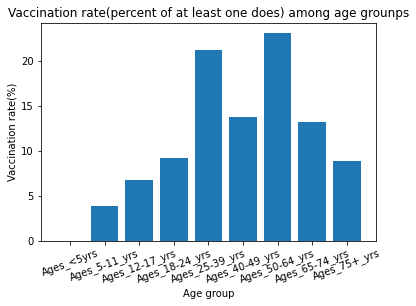

In [6]:
# Plot the latest vaccination rate among age groups
category = data['Demographic_category'].unique()
age_category = ['Ages_<5yrs', 'Ages_5-11_yrs', 'Ages_12-17_yrs', 'Ages_18-24_yrs', \
                'Ages_25-39_yrs', 'Ages_40-49_yrs', 'Ages_50-64_yrs', 'Ages_65-74_yrs', 'Ages_75+_yrs']
latest_data = data[data['Date'] == '03/10/2022']

res = []
for item in age_category:
    res.append(latest_data[latest_data['Demographic_category'] == item])
tbl = pd.concat(res)
plt.bar(age_category,tbl['Administered_Dose1_pct_US'])
plt.title("Vaccination rate(percent of at least one does) among age grounps")
plt.xlabel("Age group", fontsize=10)
plt.ylabel("Vaccination rate(%)")
# Rotate the xlabels to avoid the from being messed up
plt.xticks(rotation=20)

In [7]:
# A pivot table on the latest vaccination rate among age groups
res = pd.pivot_table(latest_data, values=['Series_Complete_Pop_Pct_US', 'Administered_Dose1_pct_US'], columns=['Demographic_category'])
tbl = res[age_category]
tbl

Demographic_category,Ages_<5yrs,Ages_5-11_yrs,Ages_12-17_yrs,Ages_18-24_yrs,Ages_25-39_yrs,Ages_40-49_yrs,Ages_50-64_yrs,Ages_65-74_yrs,Ages_75+_yrs
Administered_Dose1_pct_US,0.0,3.8,6.8,9.2,21.2,13.8,23.1,13.2,8.9
Series_Complete_Pop_Pct_US,0.0,3.5,6.8,8.8,20.9,13.9,23.6,13.4,9.1


In [8]:
# Add month column to the data set

In [9]:
month_date = [datetime.strptime(x[:2] + x[5:], '%m/%Y') for x in data['Date']]
data['Month'] = month_date

In [10]:
# Get monthly average data of vaccination rate
res = []
for item in age_category:
    subset = data[data['Demographic_category'] == item]
    tbl = subset.groupby('Month').mean()
    tbl['Demographic_category'] = item
    res.append(tbl)
df = pd.concat(res)
tbl = pd.pivot_table(df, values = 'Administered_Dose1_pct_US', columns= ['Demographic_category'], index='Month')

Text(0.5, 1.0, 'Vaccination rate(%) among age groups v.s. time')

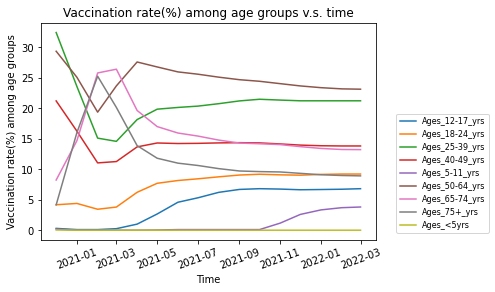

In [11]:
# Plot monthly vaccination data among different age groups
plt.plot(tbl, label=tbl.columns)
plt.legend(prop={'size': 8},bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation=20)
plt.xlabel("Time")
plt.ylabel("Vaccination rate(%) among age groups")
plt.title("Vaccination rate(%) among age groups v.s. time")


Text(0.5, 1.0, 'Vaccination rate(%) between genders v.s. time')

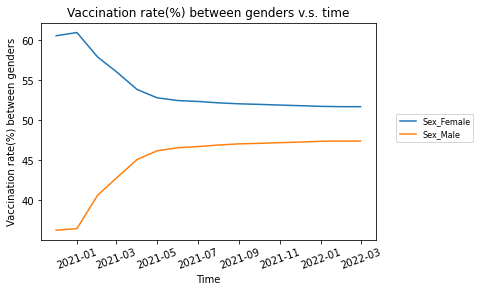

In [12]:
# Plot monthly vaccination data between male and female
res = []
for item in ['Sex_Male', 'Sex_Female']:
    subset = data[data['Demographic_category'] == item]
    tbl = subset.groupby('Month').mean()
    tbl['Demographic_category'] = item
    res.append(tbl)
df = pd.concat(res)
tbl = pd.pivot_table(df, values = 'Administered_Dose1_pct_US', columns= ['Demographic_category'], index='Month')
plt.plot(tbl, label=tbl.columns)
plt.legend(prop={'size': 8},bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation=20)
plt.xlabel("Time")
plt.ylabel("Vaccination rate(%) between genders")
plt.title("Vaccination rate(%) between genders v.s. time")

## Discussion

I use this discussion cell do address the 2 questions raised at the beginning of this cpa.

In terms of vaccination rate between age groups, we can see that the trending behaves differently. Vaccination rate for young adults and middle aged are relatively higher at the beginning, then jump down a bit and become flattened. While the elders have a lower vaccination rate, bump up sharply and also become flattened. The vaccination rate for kids are near 0 because there is no vaccination for kids under 5.

And according to the last figure, there is indeed a gender gap between vaccination rates, although the gap is narrowing, which is a relief.